# 1470 final project notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_datasets as tfds
import sklearn as sk
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import assignment
import random
from tensorflow.keras.models import load_model
from PIL import Image


## Data Preprocessing: IAUFD !

In [2]:
# model = Sequential()

# model.add(Conv2D(64, (3,3), input_shape=[224,224,3], strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(64,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(128,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Conv2D(256, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(256, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(256,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(512,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(512, (3,3), strides=(2,2), padding='same', activation=tf.nn.relu,  kernel_initializer='he_uniform'))
# model.add(Conv2D(512,(3,3), strides=(2,2),padding='same', activation=tf.nn.relu, kernel_initializer='he_uniform'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [3]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
imageIndices = list(range(1, 10000))
random.shuffle(imageIndices)

trainingIndices = imageIndices[0: 8000]
testIndices = imageIndices[8001:]

for i in range(0, 8000, 5000):
    currentIndice = trainingIndices[i: i + 5000]

    y_train = np.asarray(assignment.preprocess_labels(currentIndice)).astype('float64')
    x_train = assignment.images_in_array(currentIndice)

    model.fit(x_train, y_train, epochs=3, batch_size=100)
    model.save('/Users/henrydonahue/Desktop/files/brown-cs/cs1470/soccer-image-captioning/code')

2022-12-11 19:20:52.084441: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/3


KeyboardInterrupt: 

In [ ]:
model = tf.keras.models.load_model('/Users/henrydonahue/Desktop/files/brown-cs/cs1470/soccer-image-captioning/code')

for i in range(1, 20000, 1000):
    currentIndice = testIndices[i: i + 1000]

    y_test = np.asarray(assignment.preprocess_labels(currentIndice)).astype("float64")
    x_test = assignment.images_in_array(currentIndice)


    results = model.evaluate(x_test, y_test, batch_size=1000)
    print("test loss, test acc:", results)

1/1 [==============================] - 2s 2s/step - loss: 10075.6084 - accuracy: 0.0330
test loss, test acc: [10075.6083984375, 0.032999999821186066]
1/1 [==============================] - 2s 2s/step - loss: 9758.3984 - accuracy: 0.0420
test loss, test acc: [9758.3984375, 0.041999999433755875]
1/1 [==============================] - 2s 2s/step - loss: 10031.0820 - accuracy: 0.0330
test loss, test acc: [10031.08203125, 0.032999999821186066]
1/1 [==============================] - 2s 2s/step - loss: 9552.7734 - accuracy: 0.0430
test loss, test acc: [9552.7734375, 0.0430000014603138]
1/1 [==============================] - 2s 2s/step - loss: 9434.9639 - accuracy: 0.0380
test loss, test acc: [9434.9638671875, 0.03799999877810478]
1/1 [==============================] - 2s 2s/step - loss: 9514.1777 - accuracy: 0.0210
test loss, test acc: [9514.177734375, 0.020999999716877937]
1/1 [==============================] - 2s 2s/step - loss: 10067.4404 - accuracy: 0.0340
test loss, test acc: [10067.4404

In [ ]:
predictions = model.predict(x_test[:500])
for list in predictions:
    for index in range(0, len(list)):
        list[index] = round(list[index])

#print(predictions)

actual = y_test[:500]

print("preds")
print(predictions[1:50])

print("actual")
print(actual[1:5])

for index in range (0,len(predictions)):


    for targ in range(0,len(predictions[0])):
        if predictions[index][targ] == actual[index][targ]:
            continue



preds
[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1.

# Preprocessing Check

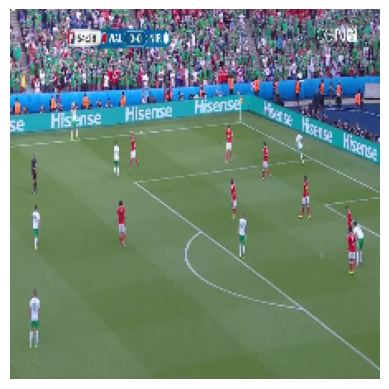

[0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]


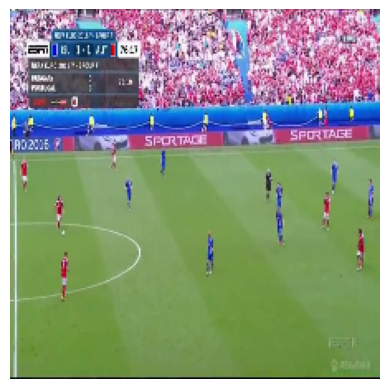

[0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]


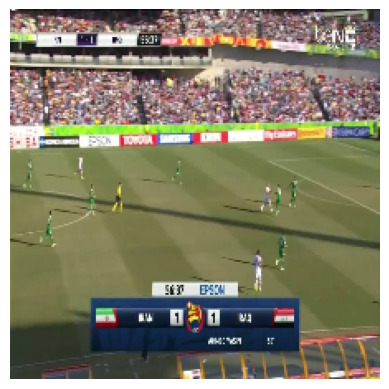

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
for i in range(2, 5):
    testImage = Image.fromarray(np.uint8(x_train[i]*255))
    plt.imshow(testImage)
    plt.axis("off")
    plt.show()
    print(y_train[i])